In [552]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
np.set_printoptions(suppress=True)

In [553]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\gapminder.csv')

In [554]:
data.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [555]:
data.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [556]:
data = data.drop(['Region'], axis =1)

In [557]:
data.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
dtype: int64

In [558]:
X = data.drop(['life'], axis = 1)
y = data.life

In [559]:
X.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2


In [560]:
y.head()

0    75.3
1    58.3
2    75.5
3    72.5
4    81.5
Name: life, dtype: float64

In [561]:
Training_Accuracy_Before = []
Testing_Accuracy_Before = []
Training_Accuracy_After = []
Testing_Accuracy_After = []
Models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [563]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
print(train_score)
test_score = logreg.score(X_test, y_test)
print(test_score)

Training_Accuracy_Before.append(train_score)
Testing_Accuracy_Before.append(test_score)

0.9076273328983272
0.8380468731430055


In [564]:
alpha_space = np.logspace(-4, 0, 30)   # Checking for alpha from .0001 to 1 and finding the best value for alpha
alpha_space

array([0.0001    , 0.00013738, 0.00018874, 0.00025929, 0.00035622,
       0.00048939, 0.00067234, 0.00092367, 0.00126896, 0.00174333,
       0.00239503, 0.00329034, 0.00452035, 0.00621017, 0.00853168,
       0.01172102, 0.01610262, 0.02212216, 0.03039195, 0.04175319,
       0.05736153, 0.07880463, 0.10826367, 0.14873521, 0.20433597,
       0.28072162, 0.38566204, 0.52983169, 0.72789538, 1.        ])

In [565]:
ridge_scores = []
ridge = Ridge(normalize = True)
for alpha in alpha_space:
    ridge.alpha = alpha
    val = np.mean(cross_val_score(ridge, X, y, cv = 10))
    ridge_scores.append(val)

In [566]:
lasso_scores = []
lasso = Lasso(normalize = True)
for alpha in alpha_space:
    lasso.alpha = alpha
    val = np.mean(cross_val_score(lasso, X, y, cv = 10))
    lasso_scores.append(val)

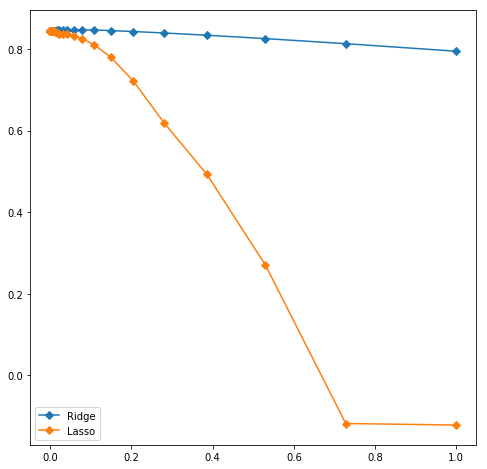

In [567]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'D', label = "Ridge")
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

In [568]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1.7073526474706923e-05}
0.8655732066102778


In [569]:
# Using value of alpha as 0.0000171 to get best accuracy for Lasso Regression
lasso = Lasso(alpha = 0.0000171, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

Training_Accuracy_Before.append(train_score)
Testing_Accuracy_Before.append(test_score)

0.9076273302855018
0.838044476752477


In [570]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.0200923300256505}
0.8660284431833843


In [571]:
# Using value of alpha as 0.020092 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = 0.020092, normalize = True)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
print(train_score)
test_score = ridge.score(X_test, y_test)
print(test_score)

Training_Accuracy_Before.append(train_score)
Testing_Accuracy_Before.append(test_score)

0.9073753179908285
0.8392240740796055


In [572]:
coefficients = lasso.coef_
coefficients

array([-0.        , -0.3307107 , -0.72121165, -0.14740159,  0.49313344,
        0.00013774, -0.25241258, -0.0867224 ])

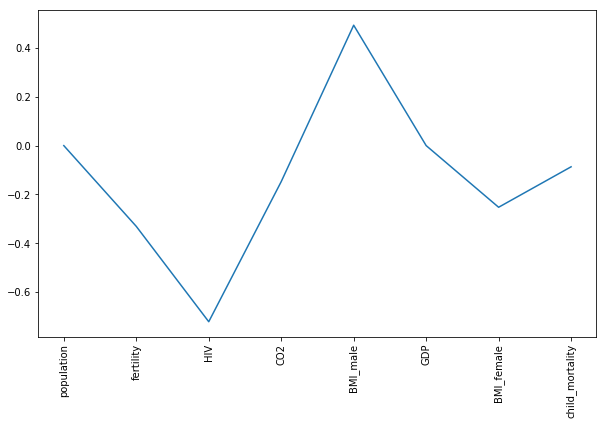

In [573]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(X_train.columns)), coefficients)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
plt.show()

In [574]:
X_train.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [575]:
X = data[['fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = data.life

In [576]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [577]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
print(train_score)
test_score = logreg.score(X_test, y_test)
print(test_score)

Training_Accuracy_After.append(train_score)
Testing_Accuracy_After.append(test_score)

0.9069672677078365
0.8394410900130606


In [578]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.0007054802310718645}
0.8648782397932617


In [579]:
# Using value of alpha as 0.000705 to get best accuracy for Lasso Regression
lasso = Lasso(alpha = 0.000705, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

Training_Accuracy_After.append(train_score)
Testing_Accuracy_After.append(test_score)

0.9069628384513525
0.8393625881990662


In [580]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.0200923300256505}
0.8653018980345291


In [581]:
# Using value of alpha as 0.020092 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = 0.020092, normalize = True)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
print(train_score)
test_score = ridge.score(X_test, y_test)
print(test_score)

Training_Accuracy_After.append(train_score)
Testing_Accuracy_After.append(test_score)

0.9066991670109754
0.8406824107198346


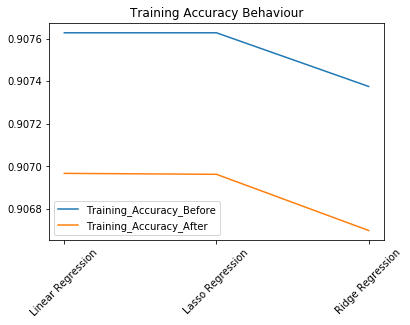

In [582]:
plt.plot(Training_Accuracy_Before, label = 'Training_Accuracy_Before')
plt.plot(Training_Accuracy_After, label = 'Training_Accuracy_After')
plt.xticks(range(len(Models)), Models, Rotation = 45)
plt.title('Training Accuracy Behaviour')
plt.legend()
plt.show()

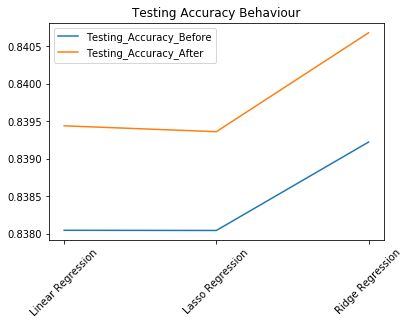

In [583]:
plt.plot(Testing_Accuracy_Before, label = 'Testing_Accuracy_Before')
plt.plot(Testing_Accuracy_After, label = 'Testing_Accuracy_After')
plt.xticks(range(len(Models)), Models, Rotation = 45)
plt.title('Testing Accuracy Behaviour')
plt.legend()
plt.show()